In [5]:
# import all needed libraries
import pandas as pd
import numpy as np
import numpy.random as nr
import sys
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection as fs

from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV


In [6]:
# load the cleaned dataset
data_cleaned = pd.read_csv(r'data_cleaned2.csv')

In [7]:
data_cleaned.head()

,country,year,clean_fuel_access_perc,elec_access_perc,nat_res_depl_perc,forest_depl_perc,agri_land_perc,agri_forest_fish_val_perc,co2_emissions_per_capita,cooling_degree_days,...,mortality_rate_under_5,net_migration,nitrous_oxide_emissions_per_capita,population_65_above_perc,population_density,female_to_male_labor_force_ratio,renewable_energy_consumption_perc,scientific_journal_articles,precipitation_evapotranspiration,unemployment_total_perc
0,Albania,2000,38.7,99.430855,0.467306,0.122940,41.751825,24.515412,1.031568,710.17,...,27.2,-63610.0,0.384636,7.821964,112.738212,69.454576,41.36,22.34,-2.147378,19.028
1,Albania,2001,41.0,99.421989,0.286160,0.060695,41.569343,22.716164,1.056868,686.38,...,25.8,-62059.0,0.375930,8.145374,111.685146,69.303040,39.04,18.38,-1.776391,18.575
2,Albania,2002,43.8,99.404579,0.296077,0.064922,41.605839,22.025114,1.233002,566.02,...,24.4,-59876.0,0.425487,8.508105,111.350730,69.232075,35.82,24.53,0.058111,17.895
3,Albania,2003,46.5,99.385628,0.312900,0.061352,40.912409,21.978257,1.361159,931.89,...,22.9,-57308.0,0.431772,8.899816,110.934890,69.876243,33.67,22.82,-0.869403,16.989
4,Albania,2004,49.2,99.372139,0.365360,0.052754,40.948905,20.537486,1.427944,554.96,...,21.5,-54383.0,0.420342,9.308444,110.472226,70.592238,35.84,17.91,-0.052818,16.310


In [8]:
data_cleaned["co2_emissions_per_capita"].describe()

count    3360.000000
mean        4.620633
std         5.714601
min         0.021790
25%         0.743443
50%         2.674141
75%         6.578129
max        47.656962
Name: co2_emissions_per_capita, dtype: float64

In [9]:
data_cleaned["year"]

0       2000
1       2001
2       2002
3       2003
4       2004
        ... 
3355    2016
3356    2017
3357    2018
3358    2019
3359    2020
Name: year, Length: 3360, dtype: int64

In [10]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   country                             3360 non-null   object 
 1   year                                3360 non-null   int64  
 2   clean_fuel_access_perc              3360 non-null   float64
 3   elec_access_perc                    3360 non-null   float64
 4   nat_res_depl_perc                   3360 non-null   float64
 5   forest_depl_perc                    3360 non-null   float64
 6   agri_land_perc                      3360 non-null   float64
 7   agri_forest_fish_val_perc           3360 non-null   float64
 8   co2_emissions_per_capita            3360 non-null   float64
 9   cooling_degree_days                 3360 non-null   float64
 10  energy_intensity_primary_energy     3360 non-null   float64
 11  fertility_rate                      3360 no

In [11]:
data_cleaned["country_id"], unique_countries = pd.factorize(data_cleaned["country"])

# convert the unique countries to a dictionary
country_mapping = {id: country for id, country in enumerate(unique_countries)}

print(country_mapping)

{0: 'Albania', 1: 'Algeria', 2: 'Angola', 3: 'Argentina', 4: 'Armenia', 5: 'Australia', 6: 'Austria', 7: 'Azerbaijan', 8: 'Bahrain', 9: 'Bangladesh', 10: 'Barbados', 11: 'Belarus', 12: 'Belgium', 13: 'Belize', 14: 'Benin', 15: 'Bhutan', 16: 'Bolivia', 17: 'Bosnia and Herzegovina', 18: 'Botswana', 19: 'Brazil', 20: 'Brunei Darussalam', 21: 'Bulgaria', 22: 'Burkina Faso', 23: 'Burundi', 24: 'Cabo Verde', 25: 'Cambodia', 26: 'Cameroon', 27: 'Canada', 28: 'Central African Republic', 29: 'Chad', 30: 'Chile', 31: 'China', 32: 'Colombia', 33: 'Congo, Dem. Rep.', 34: 'Congo, Rep.', 35: 'Costa Rica', 36: "Cote d'Ivoire", 37: 'Croatia', 38: 'Cuba', 39: 'Cyprus', 40: 'Czechia', 41: 'Denmark', 42: 'Djibouti', 43: 'Dominican Republic', 44: 'Ecuador', 45: 'Egypt, Arab Rep.', 46: 'El Salvador', 47: 'Estonia', 48: 'Ethiopia', 49: 'Fiji', 50: 'Finland', 51: 'France', 52: 'Gabon', 53: 'Gambia, The', 54: 'Georgia', 55: 'Germany', 56: 'Ghana', 57: 'Greece', 58: 'Guatemala', 59: 'Guinea', 60: 'Guinea-Bissa

In [12]:
# Create a new DataFrame with 'country_id' and 'country' columns
data_cleaned[['country_id', 'country']].value_counts()


country_id  country    
0           Albania        21
1           Algeria        21
102         Namibia        21
103         Nepal          21
104         Netherlands    21
                           ..
54          Georgia        21
55          Germany        21
56          Ghana          21
57          Greece         21
159         Zimbabwe       21
Name: count, Length: 160, dtype: int64

In [13]:
data_cleaned.drop(['country'], axis=1, inplace=True)

In [14]:
data_cleaned.head()

,year,clean_fuel_access_perc,elec_access_perc,nat_res_depl_perc,forest_depl_perc,agri_land_perc,agri_forest_fish_val_perc,co2_emissions_per_capita,cooling_degree_days,energy_intensity_primary_energy,...,net_migration,nitrous_oxide_emissions_per_capita,population_65_above_perc,population_density,female_to_male_labor_force_ratio,renewable_energy_consumption_perc,scientific_journal_articles,precipitation_evapotranspiration,unemployment_total_perc,country_id
0,2000,38.7,99.430855,0.467306,0.122940,41.751825,24.515412,1.031568,710.17,4.13,...,-63610.0,0.384636,7.821964,112.738212,69.454576,41.36,22.34,-2.147378,19.028,0
1,2001,41.0,99.421989,0.286160,0.060695,41.569343,22.716164,1.056868,686.38,3.89,...,-62059.0,0.375930,8.145374,111.685146,69.303040,39.04,18.38,-1.776391,18.575,0
2,2002,43.8,99.404579,0.296077,0.064922,41.605839,22.025114,1.233002,566.02,4.10,...,-59876.0,0.425487,8.508105,111.350730,69.232075,35.82,24.53,0.058111,17.895,0
3,2003,46.5,99.385628,0.312900,0.061352,40.912409,21.978257,1.361159,931.89,3.80,...,-57308.0,0.431772,8.899816,110.934890,69.876243,33.67,22.82,-0.869403,16.989,0
4,2004,49.2,99.372139,0.365360,0.052754,40.948905,20.537486,1.427944,554.96,3.96,...,-54383.0,0.420342,9.308444,110.472226,70.592238,35.84,17.91,-0.052818,16.310,0


In [15]:
from sklearn.model_selection import TimeSeriesSplit 

tss = TimeSeriesSplit(n_splits=4)

In [16]:
data_cleaned.set_index('year', inplace=True)
data_cleaned.sort_index(inplace=True)

# Create lagged variables for CO2 emissions per capita
data_cleaned['co2_emissions_per_capita_lag1'] = data_cleaned.groupby('country_id')['co2_emissions_per_capita'].shift(1)
data_cleaned['co2_emissions_per_capita_lag2'] = data_cleaned.groupby('country_id')['co2_emissions_per_capita'].shift(2)

# Drop rows with NaN values created by lag features
data_cleaned.dropna(inplace=True)

X = data_cleaned.drop(labels=['co2_emissions_per_capita'], axis=1)
y = data_cleaned['co2_emissions_per_capita']

In [17]:
X.shape

(3040, 32)

In [18]:
# train test split for a time series dataset
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [19]:
y_train.index


Index([2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int64', name='year', length=2432)

In [20]:
X_train.index

Index([2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int64', name='year', length=2432)

In [21]:
y_test.index

Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
       ...
       2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
      dtype='int64', name='year', length=608)

Text(0.5, 1.0, 'Mean CO2 Emissions per Capita by Year')

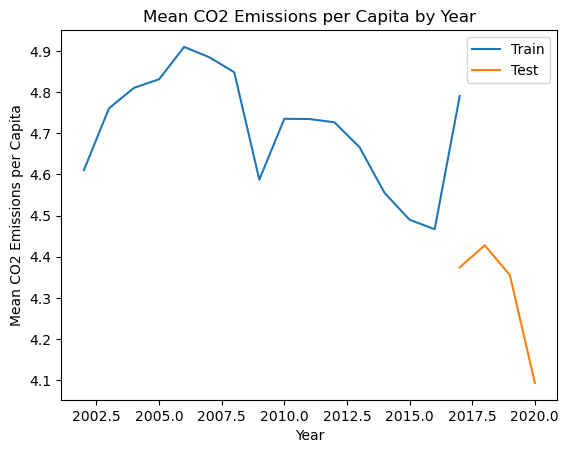

In [22]:
# Plot the mean CO2 emissions per capita by year for train and test sets
y_train.groupby('year').mean().plot(label='Train', legend=True)
y_test.groupby('year').mean().plot(label='Test', legend=True)

plt.xlabel('Year')
plt.ylabel('Mean CO2 Emissions per Capita')
plt.title('Mean CO2 Emissions per Capita by Year')

***

## Feature selection with cross-validation

Having a high ratio of features to data points has the following disadvantages:
* Not all features are expected to have an important influence when predicting the CO2 emissions.
* Some features are correlated among each other and therefore partially duplicate their influence on the DV (multicollinearity of the variables). Having additional correlated features gives no additional information gain when learning the training set and is for some machine learning algorithms not allowed.
* Sometimes a too many variables means too many degrees of freedom for the algorithm, leading to overfitting on the training set and therefore reducing prediction generalization/precision on newly unseen data.
    
This is why it is necessary to conduct feature selection, in other words - to decide which features would be most suitable for the current predictive challenge. For the purpose of better prediction generalization on new data, the features are selected by evaluating a Random Forest model for different combinationf of features involved, simultaneously using cross-validation.

The feature ranking class sklearn.feature_selection.RFECV used here incorporates recursive feature elimination and cross-validated selections. Once fitted to the training data, it ranks the models with the different features by the R2 score and returns this rank. Consequently, only the most relevant features are kept for the further analysis for both the training and testing dataset (variables features_train_reduced and features_test_reduced).

In [23]:
# Set folds for cross-validation for the feature selection
random_state_num = 42
# nr.seed() is used to set the random seed for the random number generator
# By setting the seed, you ensure that the sequence of random numbers generated is the same each time the code is executed.
nr.seed(1) 
feature_folds = KFold(n_splits=4, shuffle=True, random_state=random_state_num)

# Define the model
rf_selector = RandomForestRegressor(random_state=random_state_num)

# Define an object for a model for recursive feature elimination with CV
nr.seed(1)
selector = RFECV(estimator=rf_selector, cv=feature_folds, scoring='r2', n_jobs=-1)

# Fit the selector to the training data
selector = selector.fit(X_train, np.ravel(y_train))

# Print the feature ranking
print("Feature ranking after RFECV:")
print(selector.ranking_)

# Print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i, j in zip(X_test, ranks_transform) if j == 1] # Selects the features with a ranking of 1 (most important features)
print("Chosen important features:")
print(chosen_features)

# create a DataFrame with the selected features
selected_features_df = X_train[chosen_features]

Feature ranking after RFECV:
[18 19  1  9  1  1 12  1  5 10  1  1 16  8  4  1 15  1  1  1 13  6  3  2
  7 11  1 14  1 17  1  1]
Chosen important features:
['nat_res_depl_perc', 'agri_land_perc', 'agri_forest_fish_val_perc', 'energy_intensity_primary_energy', 'forest_area_perc', 'gdp_growth_perc', 'labor_force_participation_perc', 'life_expectancy', 'methane_emissions_per_capita', 'mortality_rate_under_5', 'scientific_journal_articles', 'unemployment_total_perc', 'co2_emissions_per_capita_lag1', 'co2_emissions_per_capita_lag2']


In [24]:
# assign only the important variables to the features array of both training and testing dataset
# features_train_reduced = selector.transform(X_train)
# features_test_reduced = selector.transform(X_test)

if "country_id" not in chosen_features:
    chosen_features.append('country_id')
features_train_reduced = X_train[chosen_features]
features_test_reduced = X_test[chosen_features]

print("Training subset shape before the recursive feature elimination:")
print(X_train.shape)
print("Training subset array shape after the recursive feature elimination:")
print(features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:")
print(features_test_reduced.shape)

Training subset shape before the recursive feature elimination:
(2432, 32)
Training subset array shape after the recursive feature elimination:
(2432, 15)
Test subset array shape after the recursive feature elimination:
(608, 15)


In [25]:
# Define value ranges for each hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

# Create the hyperparameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [26]:
# define the cross-validation folds for the hyperparameter tuning
nr.seed(1)
inside_folds = ms.KFold(n_splits=5, shuffle = True, random_state=random_state_num)

# Define the random forest regressor model object
rf_tuner = RandomForestRegressor(random_state=random_state_num)

# Perform a randomized search on the grid
nr.seed(1)
rf_model = ms.RandomizedSearchCV(estimator=rf_tuner, param_distributions = param_grid,
                                 random_state=random_state_num, refit=True,
                                 cv=inside_folds, scoring = 'r2', return_train_score=True, n_jobs=-1)

In [27]:
# Fit the grid search model object with cross-validation on the data
rf_model.fit(features_train_reduced, np.ravel(y_train))

# Print the best parameter value
best_n_estimators = rf_model.best_estimator_.n_estimators
best_max_features = rf_model.best_estimator_.max_features

print("best number of estimators:")
print(best_n_estimators)
print("best max_features:")
print(best_max_features)
print("max_depth:")
print(rf_model.best_estimator_.max_depth)
print("min_samples_split")
print(rf_model.best_estimator_.min_samples_split)
print("min_samples_leaf")
print(rf_model.best_estimator_.min_samples_leaf)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pack

best number of estimators:
1400
best max_features:
sqrt
max_depth:
30
min_samples_split
5
min_samples_leaf
1


In [28]:
# pick the model with the best hyperparameter combination for further analysis
rf_best_model = rf_model.best_estimator_

In [29]:
# define the cross-validation folds for the evaluation
nr.seed(1)
outside_folds = ms.KFold(n_splits=10, shuffle = True, random_state=random_state_num)

# Evaluate the model on the training subset with cross-validation
nr.seed(1)
cv_eval = cross_val_score(rf_best_model, features_train_reduced, y_train, cv = outside_folds, n_jobs=-1)

print('Mean R2 score of all CV folds = %4.3f' % np.mean(cv_eval))
print('Standard deviation of the R2 score over all folds = %4.3f' % np.std(cv_eval))
print('R2 score for each fold:')

# print the R2 score for each fold
for i, j in enumerate(cv_eval):
    print('Fold %2d    %4.3f' % (i+1, j))

Mean R2 score of all CV folds = 0.994
Standard deviation of the R2 score over all folds = 0.002
R2 score for each fold:
Fold  1    0.991
Fold  2    0.993
Fold  3    0.995
Fold  4    0.995
Fold  5    0.995
Fold  6    0.997
Fold  7    0.995
Fold  8    0.994
Fold  9    0.993
Fold 10    0.996


In [30]:
# make predictions from the features of the testing subset
predictions = rf_best_model.predict(features_test_reduced)

# import the functions for the metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

# calculate the metrics basing on the predicted and true values for the test subset
r2 = r2_score(y_true=y_test, y_pred=predictions)
mse = mean_squared_error(y_true=y_test, y_pred=predictions)
rmse = np.sqrt(mse)

print("R2=")
print(r2)
print("Mean Squared Error: MSE=")
print(mse)
print("Root Mean Squared Error: RMSE=")
print(rmse)

R2=
0.9856410536091401
Mean Squared Error: MSE=
0.3556656479153798
Root Mean Squared Error: RMSE=
0.5963771021051862


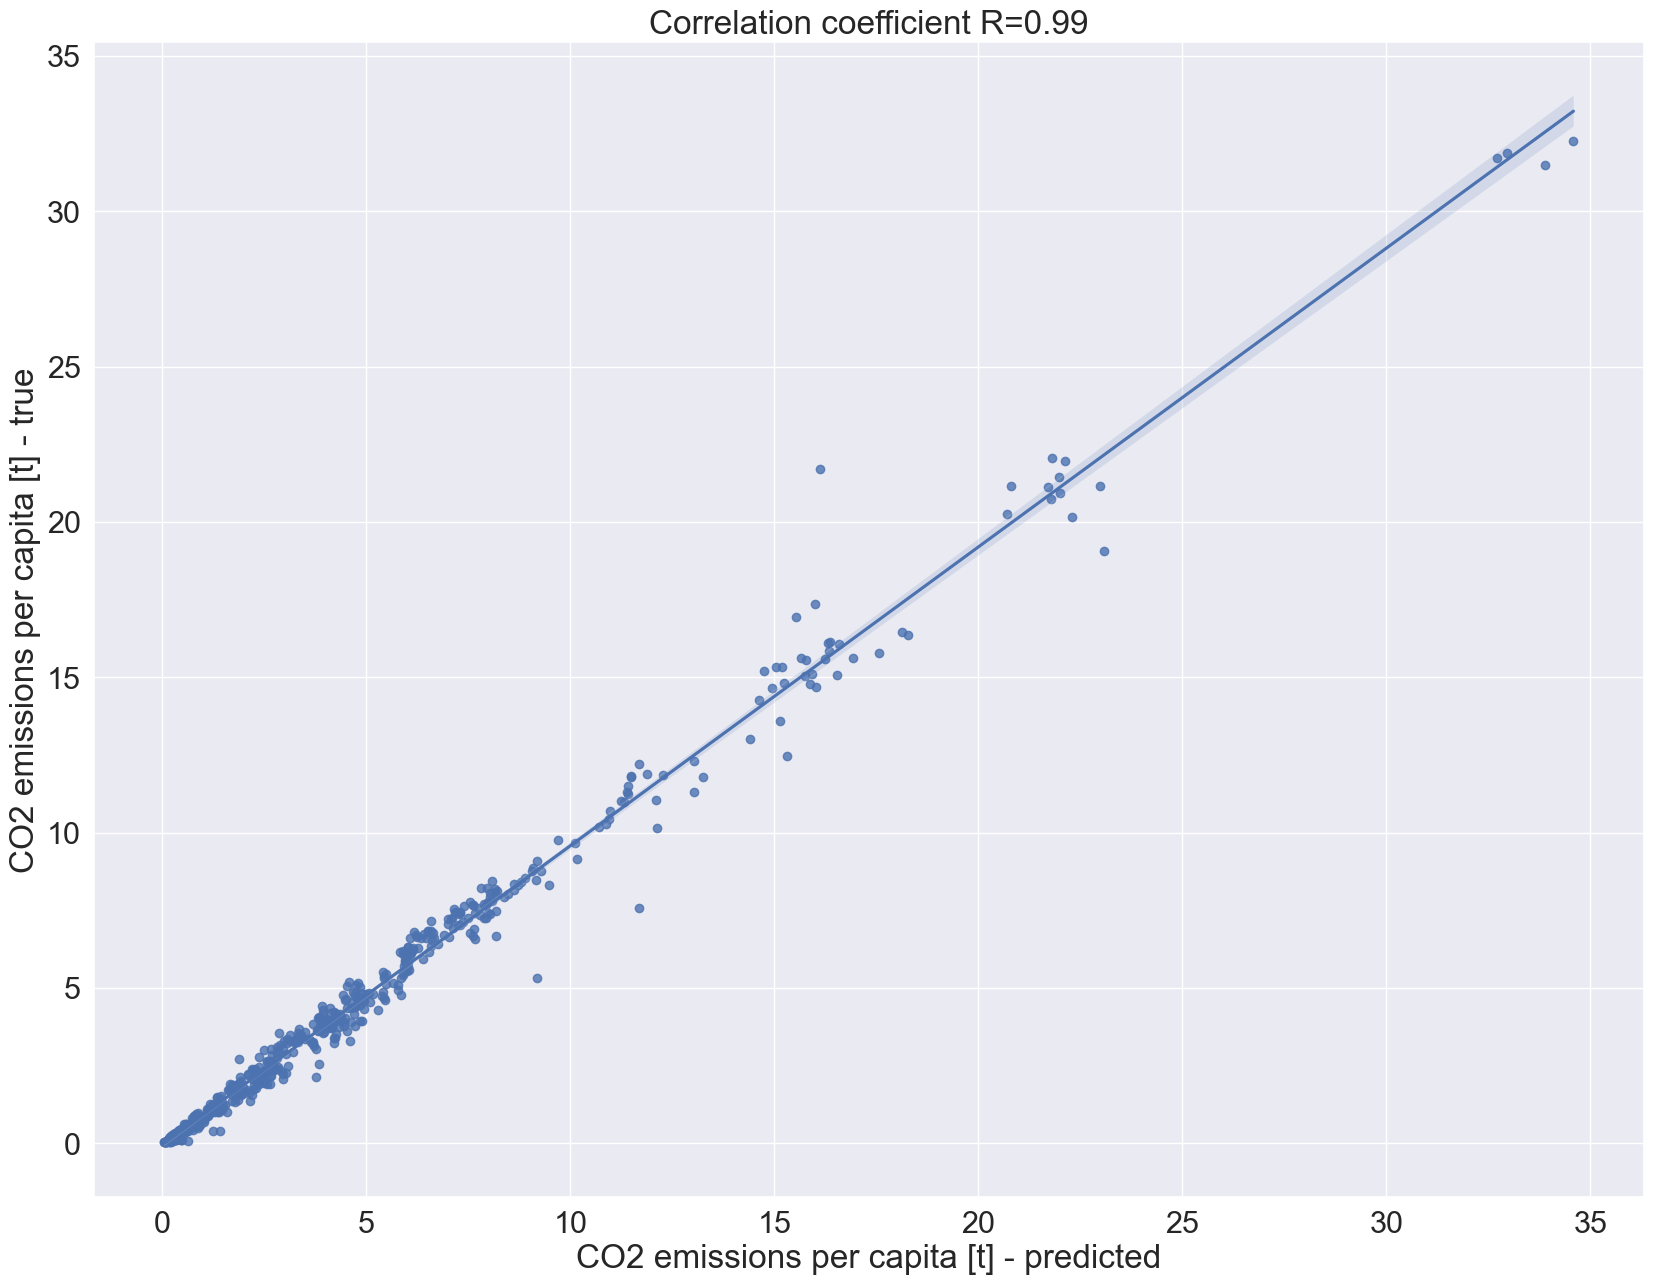

In [51]:
# Ensure y_test is a 1-dimensional array
y_test = np.array(y_test).flatten()
predictions = np.array(predictions).flatten()

# Plot predicted vs true values of the test subset
f, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=y_test, fit_reg=True)
plt.xlabel("CO2 emissions per capita [t] - predicted")
plt.ylabel("CO2 emissions per capita [t] - true")
plt.title("Correlation coefficient R=" + str(round(np.corrcoef(predictions, y_test)[0, 1], 2)))
plt.show()

In [52]:
# features_test_reduced.reset_index(inplace=True)

In [53]:
features_test_reduced

,index,year,nat_res_depl_perc,agri_land_perc,agri_forest_fish_val_perc,energy_intensity_primary_energy,forest_area_perc,gdp_growth_perc,labor_force_participation_perc,life_expectancy,methane_emissions_per_capita,mortality_rate_under_5,scientific_journal_articles,unemployment_total_perc,co2_emissions_per_capita_lag1,co2_emissions_per_capita_lag2,country_id
0,0,2017,0.000000,65.818182,2.792911,3.50,13.834800,0.903028,52.157,79.654000,0.534000,9.0,1528.73,10.168,4.434700,4.222074,83
1,1,2017,11.241381,10.397436,0.290595,8.33,0.820513,4.290950,73.498,79.689000,11.463930,7.3,237.99,1.192,21.495310,22.385625,8
2,2,2017,4.086927,22.507650,9.329259,3.18,51.097761,2.368387,70.977,76.972000,1.692737,14.4,1586.96,3.840,2.420481,2.555603,44
3,3,2017,0.079092,29.759704,1.431974,2.66,6.469501,4.276596,73.669,82.551220,1.067907,3.8,12322.35,4.140,7.633162,7.913354,71
4,4,2017,0.278074,44.419190,26.961066,1.56,1.039832,-5.071796,33.164,65.957000,0.322704,60.3,122.36,18.504,0.342802,0.475240,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,603,2020,0.212690,19.178439,7.554892,3.76,61.486989,-15.306894,64.236,75.931707,1.260630,2.5,309.32,17.880,4.181645,4.018308,98
604,604,2020,5.480119,72.358944,12.965656,6.64,9.099658,-4.557752,64.128,72.141000,5.512313,15.4,209.71,6.590,7.160836,6.809659,97
605,605,2020,0.004433,68.865061,9.366692,5.08,11.753222,-8.275978,71.645,70.166000,1.247453,14.5,271.60,1.210,3.348667,3.160421,96
606,606,2020,0.514789,28.747820,22.180090,5.69,41.590722,-2.369621,42.242,69.246000,0.805614,28.2,1464.10,13.119,0.480725,0.531082,103


In [54]:
features_test_reduced.year

0      2017
1      2017
2      2017
3      2017
4      2017
       ... 
603    2020
604    2020
605    2020
606    2020
607    2020
Name: year, Length: 608, dtype: int64

In [55]:
# features_train_reduced = X_train[chosen_features]
# features_test_reduced = X_test[chosen_features]

# Predict CO2 emissions for future years (e.g., next 5 years)
X_test.index = pd.to_datetime(X_test.index)
last_known_year = X_test.index[-1].year

future_years = pd.date_range(start=pd.to_datetime(f'{last_known_year + 1}-01-01'), periods=5, freq='Y')

# Convert y_test to a Series if it's currently a NumPy array
y_test = pd.Series(y_test, name='co2_emissions_per_capita')

# Create a DataFrame for future features
future_features = pd.DataFrame(index=future_years)
future_features['country_id'] = features_test_reduced['country_id'].iloc[-1]  # Assuming the last known country
future_features['co2_emissions_per_capita_lag1'] = y_test.iloc[-1]  # Last known CO2 emissions
future_features['co2_emissions_per_capita_lag2'] = y_test.shift(1).iloc[-1]  # Second last known CO2 emissions

# Predict future CO2 emissions
future_predictions = rf_best_model.predict(future_features)

# Create a Series for future predictions
future_forecast = pd.Series(future_predictions, index=future_years)

# Print future predictions
print("Future CO2 Emissions per Capita Predictions:")
print(future_forecast)

/var/folders/r2/8t4lt6m50fs6052zj19gbf1r0000gn/T/ipykernel_67144/4073403541.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=pd.to_datetime(f'{last_known_year + 1}-01-01'), periods=5, freq='Y')


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- agri_forest_fish_val_perc
- agri_land_perc
- energy_intensity_primary_energy
- forest_area_perc
- gdp_growth_perc
- ...
